# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data collection and Preprocessing

In [2]:
# loading the data from csv file to a Pandas DataFrame
df= pd.read_csv('Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
#Check for missing/null values:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Encode 'Gender' column to numeric
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print("\nData after encoding 'Gender':")
print(df.head())


Data after encoding 'Gender':
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40



Pairplot of Age, Annual Income and Spending Score:


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


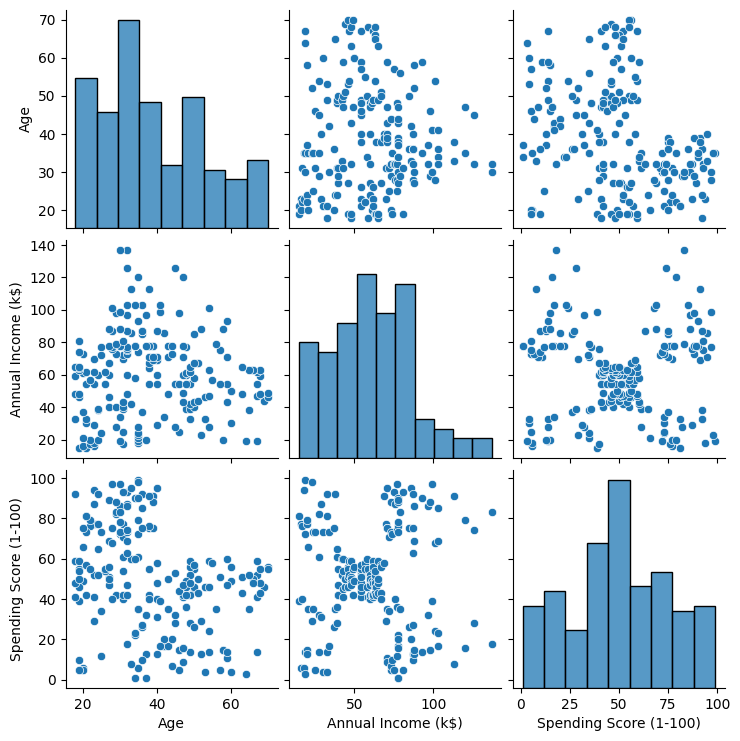

In [9]:
# Exploratory Data Analysis
print("\nPairplot of Age, Annual Income and Spending Score:")
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [10]:
# Prepare data for clustering (using Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
# Elbow method to find optimal number of clusters
# WCSS (Within-Cluster Sum of Squares) measures intra-cluster variance.
# We want to find the "elbow" point where adding more clusters doesn't reduce WCSS much.

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=18,n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    

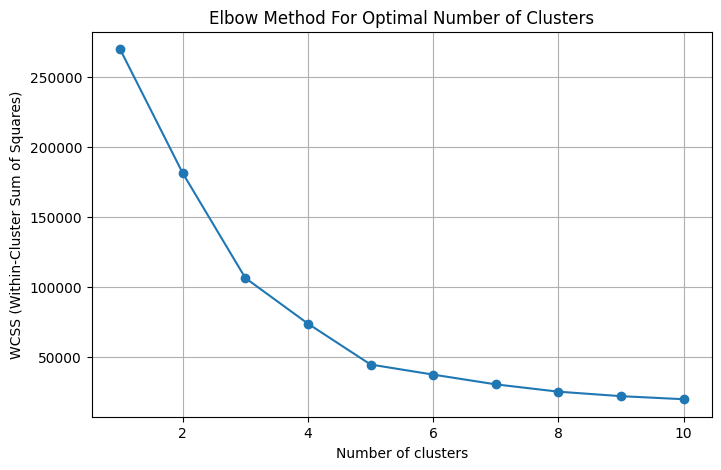

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


In [13]:
# Silhouette Score measures how well points fit within their clusters (range: -1 to 1).
# Higher score means better defined clusters.

silhouette_scores = []
for k in range(2, 11):  # must be at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=20,n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)



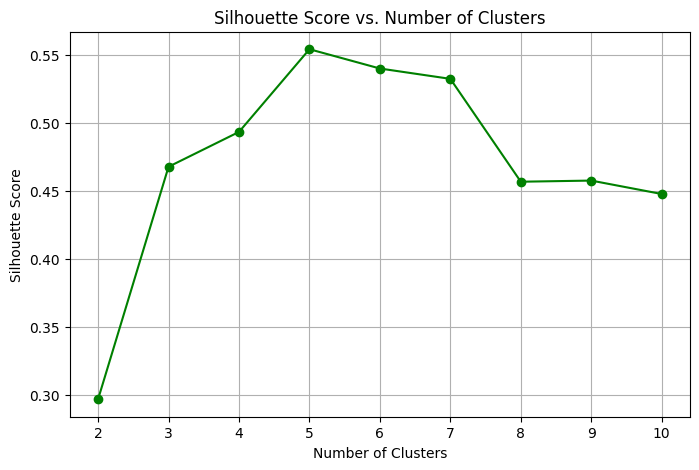

In [14]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')#range(2,11) is used for values of k
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [15]:
# we choose number of clusters as 5 for which Silhouette Score is highest and also we can see from elbow plot
kmeans = KMeans(n_clusters=5, random_state=24,n_init= 'auto')
df['Cluster'] = kmeans.fit_predict(X)
#n_init is no of timnes it takes a centre and calculte the 
# Calculate silhouette score for the final clustering
final_sil_score = silhouette_score(X, df['Cluster'])
print(f"\nSilhouette Score for final clustering: {final_sil_score:.4f}")


Silhouette Score for final clustering: 0.5539


In [16]:
print("\nCluster assignments:")
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


Cluster assignments:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        4
1           2                  15                      81        1
2           3                  16                       6        4
3           4                  16                      77        1
4           5                  17                      40        4


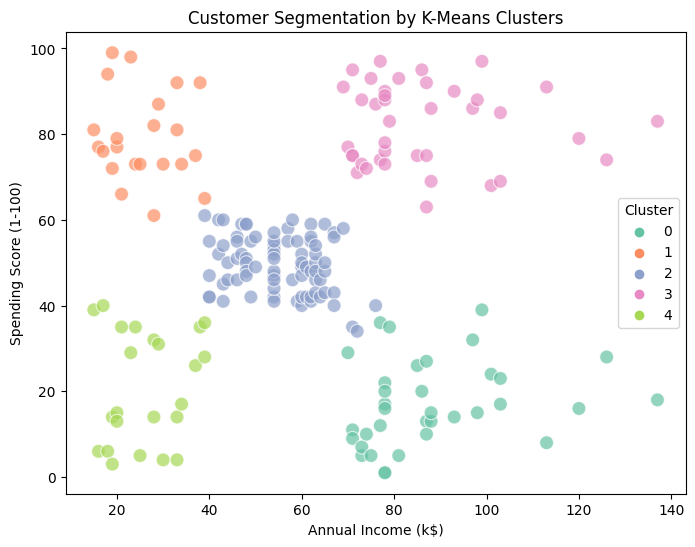

In [17]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', data=df, s=100, alpha=0.7)
plt.title('Customer Segmentation by K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [18]:
# Mean values per cluster
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,164.371429,0.542857,41.114286,88.200000,17.114286
1,23.090909,0.409091,25.272727,25.727273,79.363636
2,86.320988,0.407407,42.716049,55.296296,49.518519
3,162.000000,0.461538,32.692308,86.538462,82.128205
4,23.000000,0.391304,45.217391,26.304348,20.913043
